In [22]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [23]:
# 1.1 - web-scraping technique

from bs4 import BeautifulSoup
import requests

def get_page_content(url):
    result = ""
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "lxml")
    content = soup.find(id="content")
    pars = content.find_all("p")
    for p in pars:
        result += p.text
    return result.lower()

URL = "https://en.wikipedia.org/wiki/Natural_language_processing"
content = get_page_content(URL)
content

'natural language processing (nlp) is an interdisciplinary subfield of computer science and linguistics. it is primarily concerned with giving computers the ability to support and manipulate speech. it involves processing natural language datasets, such as text corpora or speech corpora, using either rule-based or probabilistic (i.e. statistical and, most recently, neural network-based) machine learning approaches. the goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. the technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.\nchallenges in natural language processing frequently involve speech recognition, natural-language understanding, and natural-language generation.\nnatural language processing has its roots in the 1950s. already in 1950, alan turing published an article titled "computing machinery and 

In [24]:
# 1.2 Preprocess text data (tokenize, remove stop words, remove punct.)

from nltk import wordpunct_tokenize
import string
from nltk.corpus import stopwords

def remove_punctuation(text):
    return "".join([c for c in text if c not in string.punctuation])

def get_clean_words(text):
    stop_words = stopwords.words("english")
    words = wordpunct_tokenize(text)
    words = [remove_punctuation(word) for word in words if remove_punctuation(word)!= ""]
    words = [word for word in words if word not in stop_words+["e","g"]]
    return words

words = get_clean_words(content)    
print(words[0:20])

['natural', 'language', 'processing', 'nlp', 'interdisciplinary', 'subfield', 'computer', 'science', 'linguistics', 'primarily', 'concerned', 'giving', 'computers', 'ability', 'support', 'manipulate', 'speech', 'involves', 'processing', 'natural']


In [25]:
# 1.3 Calculate Word Frequencies

from nltk.probability import FreqDist

def calculate_words_frequency(words):
    fdist_words = FreqDist(words)
    max_count = fdist_words.most_common(1)[0][1]
    for word in fdist_words.keys():
        fdist_words[word] = fdist_words[word]/max_count
    return fdist_words

words_frequency = calculate_words_frequency(words)
print(words_frequency.most_common(20))

[('language', 1.0), ('natural', 0.6956521739130435), ('nlp', 0.6521739130434783), ('cognitive', 0.5652173913043478), ('processing', 0.5217391304347826), ('linguistics', 0.391304347826087), ('based', 0.391304347826087), ('tasks', 0.391304347826087), ('approach', 0.391304347826087), ('statistical', 0.34782608695652173), ('neural', 0.30434782608695654), ('machine', 0.30434782608695654), ('learning', 0.2608695652173913), ('approaches', 0.2608695652173913), ('rules', 0.2608695652173913), ('speech', 0.21739130434782608), ('rule', 0.21739130434782608), ('understanding', 0.17391304347826086), ('intelligence', 0.17391304347826086), ('symbolic', 0.17391304347826086)]


In [26]:
# 1.4 Score the sentences

from nltk import sent_tokenize

def score_sentence(sentence):
    words = wordpunct_tokenize(sentence.lower())
    score = 0
    for word in words:
        if word in words_frequency.keys():
            score += words_frequency[word]
    return score

sentences = sent_tokenize(content)
sent_dict = {}
for sentence in sentences:
    score = score_sentence(sentence)
    sent_dict[sentence] = score
    
# sort by scores

sent_dict = {key:value for key, value in sorted(sent_dict.items(), key=lambda item: item[1], reverse = True)}
sent_dict

{'as an example, george lakoff offers a methodology to build natural language processing (nlp) algorithms through the perspective of cognitive science, along with the findings of cognitive linguistics,[47] with two defining aspects:\nties with cognitive linguistics are part of the historical heritage of nlp, but they have been less frequently addressed since the statistical turn during the 1990s.': 7.913043478260872,
 'machine learning approaches, which include both statistical and neural networks, on the other hand, have many advantages over the symbolic approach: \nalthough rule-based systems for manipulating symbols were still in use in 2020, they have become mostly obsolete with the advance of llms in 2023. \nbefore that they were commonly used:\nin the late 1980s and mid-1990s, the statistical approach ended a period of ai winter, which was caused by the inefficiencies of the rule-based approaches.': 6.5652173913043494,
 'challenges in natural language processing frequently involv

In [27]:
# 1.5 Build a summary based on sentence count, word count, and percentage

def build_summary_based_on_sentence_count(sentence_count):
    result = ""
    i = 0
    for sentence, score in sent_dict.items():
        if i >= sentence_count:
            break
        if result != "":
            result += "\n"
        result += sentence
        i += 1
    return result

def build_summary_based_on_word_count(word_count):
    result = ""
    sent_index = 0
    word_index = 0
    word_counter = 0
    sent_words = []
    space = ""
    new_line = ""
    sentences = list(sent_dict)
    while word_counter < word_count:
        if len(sent_words) == 0:
            sent_words = wordpunct_tokenize(sentences[sent_index])
            word_index = 0
            space = ""
            if len(result)>0:
                new_line = "\n"
        if word_index < len(sent_words):
            result += new_line + space + sent_words[word_index]
            word_index += 1
            word_counter += 1
            space = " "
            new_line = ""
        else:
            sent_words = []
            sent_index += 1
    return result

def build_summary_based_on_percentage(percentage):
    total_words = len(words)
    word_count = (percentage/100)*total_words
    return build_summary_based_on_word_count(word_count) 

print("summary based on sentence count")
print(build_summary_based_on_sentence_count(3))

print("\n\n\nsummary based on word count")
print(build_summary_based_on_word_count(100))

print("\n\n\nsummary based on percentage")
print(build_summary_based_on_percentage(15))

summary based on sentence count
as an example, george lakoff offers a methodology to build natural language processing (nlp) algorithms through the perspective of cognitive science, along with the findings of cognitive linguistics,[47] with two defining aspects:
ties with cognitive linguistics are part of the historical heritage of nlp, but they have been less frequently addressed since the statistical turn during the 1990s.
machine learning approaches, which include both statistical and neural networks, on the other hand, have many advantages over the symbolic approach: 
although rule-based systems for manipulating symbols were still in use in 2020, they have become mostly obsolete with the advance of llms in 2023. 
before that they were commonly used:
in the late 1980s and mid-1990s, the statistical approach ended a period of ai winter, which was caused by the inefficiencies of the rule-based approaches.
challenges in natural language processing frequently involve speech recognition,

In [28]:
# 2.1 Follow the following code examples to generate N-grams with NLTK

from nltk import ngrams, word_tokenize

def generate_ngrams(text, n):
    n_grams = ngrams(word_tokenize(text.lower()), n)
    return [' '.join(grams) for grams in n_grams]

n2_grams = generate_ngrams(content, 2)
print("bi-grams:")
print(n2_grams[0:20])

n3_grams = generate_ngrams(content, 3)
print("\ntri-grams:")
print(n3_grams[0:20])

n4_grams = generate_ngrams(content, 4)
print("\n4-grams:")
print(n4_grams[0:20])

bi-grams:
['natural language', 'language processing', 'processing (', '( nlp', 'nlp )', ') is', 'is an', 'an interdisciplinary', 'interdisciplinary subfield', 'subfield of', 'of computer', 'computer science', 'science and', 'and linguistics', 'linguistics .', '. it', 'it is', 'is primarily', 'primarily concerned', 'concerned with']

tri-grams:
['natural language processing', 'language processing (', 'processing ( nlp', '( nlp )', 'nlp ) is', ') is an', 'is an interdisciplinary', 'an interdisciplinary subfield', 'interdisciplinary subfield of', 'subfield of computer', 'of computer science', 'computer science and', 'science and linguistics', 'and linguistics .', 'linguistics . it', '. it is', 'it is primarily', 'is primarily concerned', 'primarily concerned with', 'concerned with giving']

4-grams:
['natural language processing (', 'language processing ( nlp', 'processing ( nlp )', '( nlp ) is', 'nlp ) is an', ') is an interdisciplinary', 'is an interdisciplinary subfield', 'an interdisc

<FreqDist with 1279 samples and 1328 outcomes>
[('natural language processing', 9), ('in natural language', 4), ('language processing .', 4), ('( e.g. ,', 3), (', e.g. ,', 3), ('grammar , [', 3), ('language processing (', 2), ('processing ( nlp', 2), ('( nlp )', 2), ('is an interdisciplinary', 2), ('and linguistics .', 2), (', such as', 2), (') machine learning', 2), ('machine learning approaches', 2), ('at the time', 2), ('of natural language', 2), ('natural language .', 2), ('of symbolic nlp', 2), ('in the late', 2), ('the late 1980s', 2)]


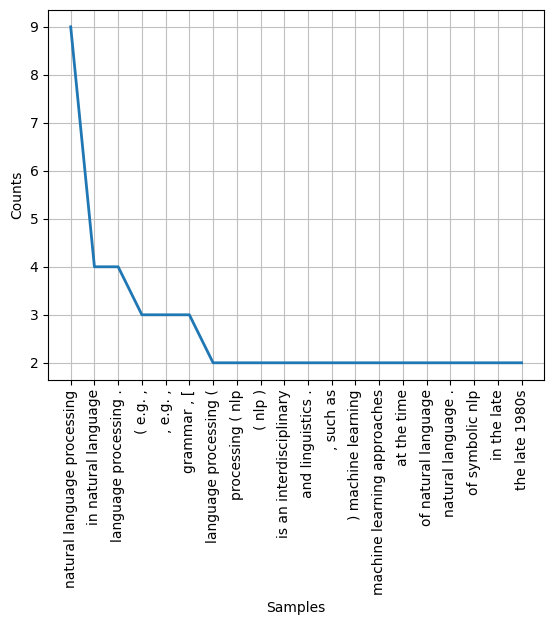

In [29]:
# 2.2a use NLTK to get N-grams and FreqDist() to calculate the n-gram frequencies

import matplotlib.pyplot as plt

def process_n_grams(n):
    n_grams = generate_ngrams(content, n)
    fdist_n_grams = FreqDist(n_grams)
    print(fdist_n_grams)
    print(fdist_n_grams.most_common(20))
    fdist_n_grams.plot(20)
    plt.show()
    
process_n_grams(3)   

In [30]:
# 2.2b Find weighted frequency occurrences from FreqDist. You can use the similar function from Task 1

def find_weighted_frequency(freq_dist):
    max_count = freq_dist.most_common(1)[0][1]
    new_freq = freq_dist.copy()
    for key, value in freq_dist.items():
        new_freq[key] = value / max_count
    return new_freq

fdist_3grams = FreqDist(n3_grams)
x = find_weighted_frequency(fdist_3grams)
x

FreqDist({'natural language processing': 1.0, 'in natural language': 0.4444444444444444, 'language processing .': 0.4444444444444444, '( e.g. ,': 0.3333333333333333, ', e.g. ,': 0.3333333333333333, 'grammar , [': 0.3333333333333333, 'language processing (': 0.2222222222222222, 'processing ( nlp': 0.2222222222222222, '( nlp )': 0.2222222222222222, 'is an interdisciplinary': 0.2222222222222222, ...})

In [31]:
# 2.2c Define the function like calculate_sentence_scores_ngram(sent_tokens, ngram_freqs, n_grams) to
#      calculate the sentence scores for any N-grams

def calculate_sentence_scores_ngram(sent_tokens, ngram_freqs, n_grams):
    sentence_scores = {}
    freqs = find_weighted_frequency(ngram_freqs)
    for sent in sent_tokens:
        sent_n_grams = generate_ngrams(sent.lower(), n_grams)
        for ngram in sent_n_grams:
            if ngram in freqs.keys():
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = freqs[ngram]
                else:
                    sentence_scores[sent] += freqs[ngram]
    return sentence_scores

n_grams = 3
ngram_freqs = FreqDist(generate_ngrams(content, n_grams))
sentence_scores = calculate_sentence_scores_ngram(sentences, ngram_freqs, n_grams)
sentence_scores

{'natural language processing (nlp) is an interdisciplinary subfield of computer science and linguistics.': 3.000000000000001,
 'it is primarily concerned with giving computers the ability to support and manipulate speech.': 1.4444444444444449,
 'it involves processing natural language datasets, such as text corpora or speech corpora, using either rule-based or probabilistic (i.e.': 2.444444444444445,
 'statistical and, most recently, neural network-based) machine learning approaches.': 1.4444444444444446,
 'the goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them.': 2.5555555555555562,
 'the technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.': 2.333333333333334,
 'challenges in natural language processing frequently involve speech recognition, natural-language understanding, and natural-language generation

In [32]:
# 2.2d Getting the summary is the same as Task 1. The following running output examples show the summarized text using tri-grams and 3 sentences (based on sentence count, word count, and percentage)

from heapq import nlargest

def build_ngram_summary_based_on_sentence_count(n_grams, sentence_count):
    ngram_freqs = FreqDist(generate_ngrams(content, n_grams))
    sentence_scores = calculate_sentence_scores_ngram(sentences, ngram_freqs, n_grams)
    summary_sentences = nlargest(sentence_count, sentence_scores, key=sentence_scores.get)
    result = " ".join(summary_sentences)
    return result

print(build_ngram_summary_based_on_sentence_count(3,3))

machine learning approaches, which include both statistical and neural networks, on the other hand, have many advantages over the symbolic approach: 
although rule-based systems for manipulating symbols were still in use in 2020, they have become mostly obsolete with the advance of llms in 2023. 
before that they were commonly used:
in the late 1980s and mid-1990s, the statistical approach ended a period of ai winter, which was caused by the inefficiencies of the rule-based approaches. nevertheless, approaches to develop cognitive models towards technically operationalizable frameworks have been pursued in the context of various frameworks, e.g., of cognitive grammar,[49] functional grammar,[50] construction grammar,[51] computational psycholinguistics and cognitive neuroscience (e.g., act-r), however, with limited uptake in mainstream nlp (as measured by presence on major conferences[52] of the acl). as an example, george lakoff offers a methodology to build natural language processin

In [33]:
# 3 Compare these two methods for text summarization. What are different and why? Please clearly explain (100-300 words).

comparison = "In the first method, we determine if a sentence captures the core idea of the material by looking at the likelihood that a "+\
    "word will appear in the text. However, in the second method, we determine the likelihood of sentences made up of two or more "+\
    "words. Compared to the first method, this would aid us in better understanding how words are formed. As a result, the first "+\
    "algorithms ratings for a sentence are different from the seconds, which leads to distinct summaries. According to theory, "+\
    "the second approach is preferable since it suggests that if two words are more likely to occur together in a sentence, "+\
    "that sentence may contain more information about the entire content."
print(len(comparison.split(" ")))

117
